https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5 by Susan Li

In [36]:
import pandas as pd
df = pd.read_csv('../analysis/NER.csv',index_col=0)
df.head()

,Chapter ID,Place ID,Character ID,Dialogue,tokens,Character Name,Gender,House,spell_count,pos_tags,chunks,all_entities_nltk
0,1,8,4,I should have known that you would be here...P...,"['known', 'would', '...', 'Professor', 'McGona...",Albus Dumbledore,Male,Gryffindor,[],"[('known', 'VBN'), ('would', 'MD'), ('...', ':...",(S known/VBN would/MD .../: Professor/NNP McGo...,[]
1,1,8,7,"Good evening, Professor Dumbledore. Are the ru...","['Good', 'evening', 'Professor', 'Dumbledore',...",Minerva McGonagall,Female,Gryffindor,[],"[('Good', 'JJ'), ('evening', 'NN'), ('Professo...",(S\n (GPE Good/JJ)\n evening/NN\n Professor...,"[Tree('GPE', [('Good', 'JJ')]), Tree('PERSON',..."
2,1,8,4,"I'm afraid so, Professor. The good, and the bad.","[""'m"", 'afraid', 'Professor', 'good', 'bad']",Albus Dumbledore,Male,Gryffindor,[],"[(""'m"", 'VBP'), ('afraid', 'JJ'), ('Professor'...",(S 'm/VBP afraid/JJ Professor/NNP good/JJ bad/JJ),[]
3,1,8,7,And the boy?,['boy'],Minerva McGonagall,Female,Gryffindor,[],"[('boy', 'NN')]",(S boy/NN),[]
4,1,8,4,Hagrid is bringing him.,"['Hagrid', 'bringing']",Albus Dumbledore,Male,Gryffindor,[],"[('Hagrid', 'NNP'), ('bringing', 'NN')]",(S (GPE Hagrid/NNP) bringing/NN),"[Tree('GPE', [('Hagrid', 'NNP')])]"


In [37]:
df = df[pd.notnull(df['Dialogue'])]

In [38]:
import re
def clean_text(row):
    text = row['Dialogue']
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [39]:
df['DialClean'] = df.apply(clean_text, axis=1)

In [40]:
df.head()

,Chapter ID,Place ID,Character ID,Dialogue,tokens,Character Name,Gender,House,spell_count,pos_tags,chunks,all_entities_nltk,DialClean
0,1,8,4,I should have known that you would be here...P...,"['known', 'would', '...', 'Professor', 'McGona...",Albus Dumbledore,Male,Gryffindor,[],"[('known', 'VBN'), ('would', 'MD'), ('...', ':...",(S known/VBN would/MD .../: Professor/NNP McGo...,[],i should have known that you would be here pro...
1,1,8,7,"Good evening, Professor Dumbledore. Are the ru...","['Good', 'evening', 'Professor', 'Dumbledore',...",Minerva McGonagall,Female,Gryffindor,[],"[('Good', 'JJ'), ('evening', 'NN'), ('Professo...",(S\n (GPE Good/JJ)\n evening/NN\n Professor...,"[Tree('GPE', [('Good', 'JJ')]), Tree('PERSON',...",good evening professor dumbledore are the rumo...
2,1,8,4,"I'm afraid so, Professor. The good, and the bad.","[""'m"", 'afraid', 'Professor', 'good', 'bad']",Albus Dumbledore,Male,Gryffindor,[],"[(""'m"", 'VBP'), ('afraid', 'JJ'), ('Professor'...",(S 'm/VBP afraid/JJ Professor/NNP good/JJ bad/JJ),[],i am afraid so professor the good and the bad
3,1,8,7,And the boy?,['boy'],Minerva McGonagall,Female,Gryffindor,[],"[('boy', 'NN')]",(S boy/NN),[],and the boy
4,1,8,4,Hagrid is bringing him.,"['Hagrid', 'bringing']",Albus Dumbledore,Male,Gryffindor,[],"[('Hagrid', 'NNP'), ('bringing', 'NN')]",(S (GPE Hagrid/NNP) bringing/NN),"[Tree('GPE', [('Hagrid', 'NNP')])]",hagrid is bringing him


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7444 entries, 0 to 7443
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Chapter ID         7444 non-null   int64 
 1   Place ID           7444 non-null   int64 
 2   Character ID       7444 non-null   int64 
 3   Dialogue           7444 non-null   object
 4   tokens             7444 non-null   object
 5   Character Name     7444 non-null   object
 6   Gender             7280 non-null   object
 7   House              6527 non-null   object
 8   spell_count        7444 non-null   object
 9   pos_tags           7444 non-null   object
 10  chunks             7444 non-null   object
 11  all_entities_nltk  7444 non-null   object
 12  DialClean          7444 non-null   object
dtypes: int64(3), object(10)
memory usage: 814.2+ KB


In [42]:
col = ['Character ID', 'DialClean']
df = df[col]

In [19]:
df.columns

Index(['Character ID', 'Dialogue'], dtype='object')

In [43]:
df.columns = ['Character_ID', 'DialClean']

In [44]:
df['category_id'] = df['Character_ID'].factorize()[0]
from io import StringIO
category_id_df = df[['Character_ID', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Character_ID']].values)

In [45]:
df.head()

,Character_ID,DialClean,category_id
0,4,i should have known that you would be here pro...,0
1,7,good evening professor dumbledore are the rumo...,1
2,4,i am afraid so professor the good and the bad,0
3,7,and the boy,1
4,4,hagrid is bringing him,0


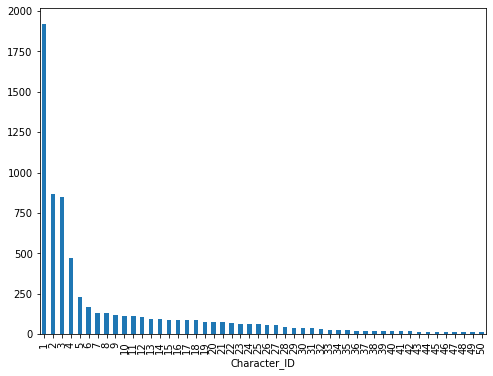

In [70]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_plt = df[df['Character_ID'] <=50]
df_plt.groupby('Character_ID').DialClean.count().plot.bar(ylim=0)
plt.show()

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words='english')

features = tfidf.fit_transform(df.DialClean).toarray()
labels = df.category_id
features.shape

(7444, 1396)

In [63]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for CharID, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]

  print("# '{}':".format(CharID))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(trigrams[-N:])))

# '1':
  . Most correlated unigrams:
       . harry
       . sir
  . Most correlated bigrams:
       . expecto patronum
       . sorry sir
  . Most correlated bigrams:
       . opened chamber secrets
       . ha ha ha
# '2':
  . Most correlated unigrams:
       . hell
       . bloody
  . Most correlated bigrams:
       . did come
       . bloody hell
  . Most correlated bigrams:
       . ha ha ha
       . tom riddle diary
# '3':
  . Most correlated unigrams:
       . ron
       . harry
  . Most correlated bigrams:
       . polyjuice potion
       . harry right
  . Most correlated bigrams:
       . ha ha ha
       . half blood prince
# '4':
  . Most correlated unigrams:
       . severus
       . horace
  . Most correlated bigrams:
       . professor slughorn
       . lord voldemort
  . Most correlated bigrams:
       . defense dark arts
       . tri wizard tournament
# '5':
  . Most correlated unigrams:
       . im
       . yeh
  . Most correlated bigrams:
       . professor dumbledore


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['DialClean'], df['Character_ID'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [59]:
print(clf.predict(count_vect.transform(["horace slughorn!"])))

[4]


In [64]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

[1]


In [68]:
df[df['DialClean'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,Character_ID,DialClean,category_id


In [ ]:
df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

,Product,Consumer_complaint_narrative,category_id
61,Credit reporting,I am disputing the inaccurate information the ...,0


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs f

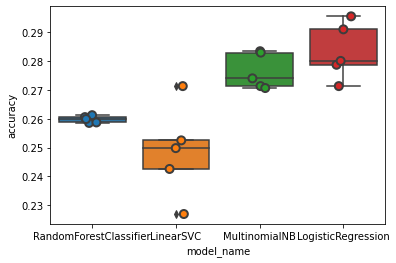

In [73]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [74]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.248656
LogisticRegression        0.283316
MultinomialNB             0.276465
RandomForestClassifier    0.259806
Name: accuracy, dtype: float64

In [75]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

AttributeError: 'DataFrame' object has no attribute 'DialClean'

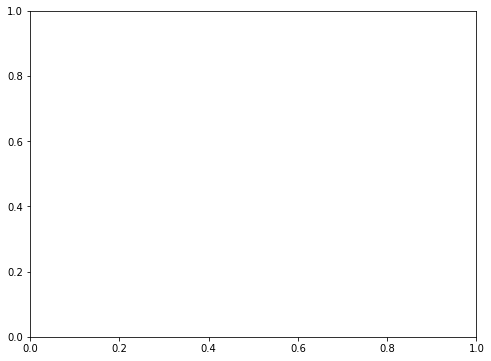

In [77]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.DialClean.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [78]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Character_ID', 'DialClean']])
      print('')

'7' predicted as '4' : 11 examples.


,Character_ID,DialClean
725,7,i do not know how you three found out about th...
3957,7,where on earth are you going at this time of n...
1284,7,well naturally the school had been searched ma...
3994,7,i cannot express in words the disappointment i...
12,7,this boy will be famous there wo not be a chil...
5081,7,severus is this it
3209,7,oh well now you know oh as for your mr weasly ...
465,7,be that as it may be it was an extremely fooli...
1864,7,could i have your attention please
241,7,will you wait along here please now before we ...



'1' predicted as '4' : 15 examples.


,Character_ID,DialClean
5886,1,i trust you with my life hagrid i trust everyo...
5454,1,personally these plants have always kind of fr...
1722,1,oh yes there is you first
1529,1,tom marvolo riddle
4408,1,what prophesy
4418,1,so what kind of prophesy are we talking about ...
6667,1,the list is wrong i told you who i am
7026,1,and i am afraid it rather extensive
3744,1,if he wanted to talk to the minister why down ...
6564,1,hello mr lovegood i am harry potter we met a f...



'20' predicted as '4' : 6 examples.


,Character_ID,DialClean
4751,20,harry have not seen him have you apparently he...



'140' predicted as '4' : 7 examples.


,Character_ID,DialClean



'48' predicted as '4' : 7 examples.


,Character_ID,DialClean


IndexError: index 141 is out of bounds for axis 0 with size 141

In [79]:
model.fit(features, labels)

LinearSVC()

In [80]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# '1':
  . Top unigrams:
       . dunno
       . shows
  . Top bigrams:
       . harry potter
       . sorry sir
# '2':
  . Top unigrams:
       . scabbers
       . bloke
  . Top bigrams:
       . bloody hell
       . did come
# '3':
  . Top unigrams:
       . grindelwald
       . ronald
  . Top bigrams:
       . best friend
       . harry right
# '4':
  . Top unigrams:
       . horace
       . madame
  . Top bigrams:
       . wand harry
       . professor slughorn
# '5':
  . Top unigrams:
       . yeh
       . im
  . Top bigrams:
       . make way
       . professor dumbledore
# '6':
  . Top unigrams:
       . protection
       . page
  . Top bigrams:
       . mr malfoy
       . old friend
# '7':
  . Top unigrams:
       . dance
       . houses
  . Top bigrams:
       . professor dumbledore
       . ronald weasley
# '8':
  . Top unigrams:
       . dangerous
       . object
  . Top bigrams:
       . dumbledore did
       . know mean
# '9':
  . Top unigrams:
       . nagini
       . wor

In [81]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"I requested a home loan modification through Bank of America. Bank of America never got back to me."
  - Predicted as: '2'

"It has been difficult for me to find my past due balance. I missed a regular monthly payment"
  - Predicted as: '1'

"I can't get the money out of the country."
  - Predicted as: '14'

"I have no money to pay my tuition"
  - Predicted as: '5'

"Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"
  - Predicted as: '1'



In [86]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['category_id'].unique()))

ValueError: Number of classes, 141, does not match size of target_names, 166. Try specifying the labels parameter